In [ ]:
import sys
print(sys.executable)

In [8]:
#!pip install --user numpy==1.20.0

In [2]:
import numpy
print(numpy.__version__)

1.26.4


In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 2

In [4]:
from pycaret.regression import *

s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4385.7164,36156482.2104,6013.0260,0.7840,0.6071,0.4729
1,4455.0441,44682552.8188,6684.5009,0.7402,0.7585,0.4238
2,3833.2771,29724235.7330,5451.9937,0.6237,0.6569,0.4767
3,3700.9972,26677402.6184,5165.0172,0.7772,0.8161,0.4888
4,4564.2299,44555609.2459,6674.9988,0.6686,0.5837,0.4369
5,4096.0914,36502502.0154,6041.7301,0.7652,0.8633,0.4016
6,4162.3172,39813471.0566,6309.7917,0.7291,0.6411,0.4436
7,4878.2127,46503200.7742,6819.3255,0.7443,0.5324,0.3909
8,4683.5755,42226069.9076,6498.1590,0.7273,0.8243,0.5704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

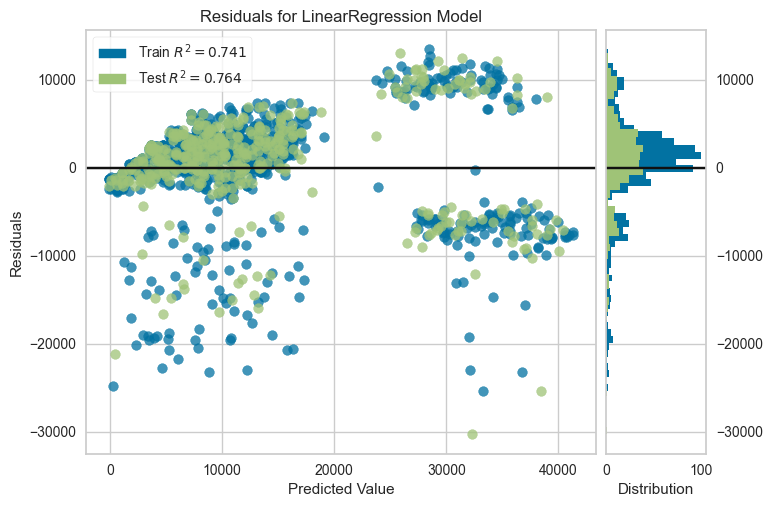

In [6]:
plot_model(lr)

In [7]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                  TransformerWrapper(include=['region'],
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
    

In [8]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [9]:
deployment_28042020

Pipeline(memory=FastMemory(location=C:\Users\CAPLOG~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Transform...
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])